In [14]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

meta_data = unpickle('cifar-10-batches-py/batches.meta')
meta_data

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [17]:
#b'data'
#b'labels'
train_batches = [batch_1, batch_2, batch_3, batch_4, batch_5]

batch_1_arr = np.array(batch_1[b'data'])
print(batch_1_arr.shape)

(10000, 3072)


In [7]:
'''Some useful functions.'''

label_names = meta_data[b'label_names']

'''Returns the accuracy rate of a prediction against the true labels.
Assumes both prediction and true_labels contain integers only, although'''
def accuracy(prediction, true_labels): 
    assert len(prediction) == len(true_labels), 'Mismatched prediction and label set'
    prediction = np.int_(np.rint(np.array(prediction))) #round to nearest integer and cast to integer type

    num_accurate = 0
    for i in range(len(prediction)): 
        if(prediction[i] == true_labels[i]): 
            num_accurate += 1 
    return (num_accurate/len(prediction))

'''Takes a label value (an integer between 1 and 10) and returns the corresponding
string which the label corresponds to. Example: 3 --> bird '''
def number_to_name(num): 
    assert type(num) == int, '{} is not an integer'.format(num)
    assert num in [x for x in range(1, 11)], '{} is not between 1 and 10'.format(num)
    return label_names[num - 1].decode('utf-8')

def join_batches(*batches): 
    features = np.array([])
    labels = np.array([])
    for batch in batches: 
        features = np.vstack((features, batch[b'data']))
        lables = np.vstack((features, batch[b'labels']))
    return features, labels
join_batches(batch_1, batch_2)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

0


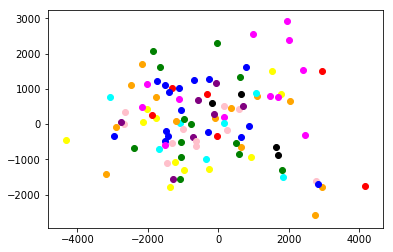

In [39]:
pca = PCA(n_components=2)
good_shit = pca.fit_transform(batch_1_arr)
x = good_shit[:,0]
y = good_shit[:,1]

label_batch_1 = np.array(batch_1[b'labels'])

color_arr = ['red', 'blue', 'orange', 'green', 'pink', 'purple', 'cyan', 'yellow', 'black', 'magenta']

for i in range(100):
    plt.scatter(x[i], y[i], c=color_arr[label_batch_1[i]])
    if i % 1000 == 0: 
        print(i)
    
#     if label_batch_1[i] == 1:
#         color = 'r'
#     elif label_batch_1[i] == 2:
#         color = 'b'
        
# print(label_batch_1.shape)
# print(good_shit.shape)

# plt.scatter(x,y)
plt.show()